In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats


# Metoda najmniejszych kwadratów

Nachylenie (a): 0.5999999999999999
Wyraz wolny (b): 2.200000000000003


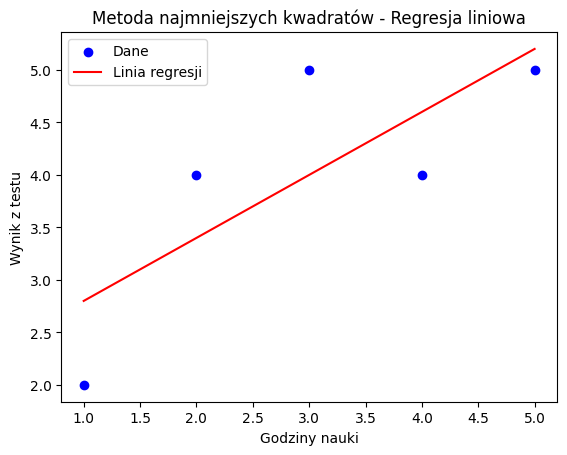

In [2]:
# Dane wejściowe: godziny nauki (x) i wyniki testu (y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Tworzenie macierzy projektującej X (dodajemy kolumnę jedynek)
X = np.vstack((x, np.ones(len(x)))).T

# Obliczanie współczynników metodą najmniejszych kwadratów
# beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Wyodrębnienie parametrów a (nachylenie) i b (wyraz wolny)
a, b = beta

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")

# Rysowanie wykresu danych i dopasowanej linii regresji
plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, a * x + b, color='red', label='Linia regresji')
plt.xlabel('Godziny nauki')
plt.ylabel('Wynik z testu')
plt.legend()
plt.title('Metoda najmniejszych kwadratów - Regresja liniowa')
plt.show()

In [ ]:
# Obliczanie reszt (błędów) modelu
residuals = y - (a * x + b)

# Obliczanie wariancji reszt
residual_variance = np.var(residuals, ddof=2)

# Obliczanie macierzy kowariancji parametrów
XTX_inv = np.linalg.inv(X.T @ X)
param_covariance_matrix = residual_variance * XTX_inv

# Błędy standardowe parametrów a i b
param_errors = np.sqrt(np.diag(param_covariance_matrix))

error_a, error_b = param_errors

error_a, error_b

In [ ]:
# Obliczanie współczynnika korelacji Pearsona z macierzy projektującej X i wektora y
# Współczynnik korelacji Pearsona: r = cov(X, y) / (std(X) * std(y))

# Obliczanie średnich
mean_x = np.mean(x)
mean_y = np.mean(y)

# Obliczanie kowariancji
cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)

# Obliczanie odchyleń standardowych
std_x = np.std(x, ddof=1)
std_y = np.std(y, ddof=1)

# Obliczanie współczynnika korelacji Pearsona
pearson_coefficient = cov_xy / (std_x * std_y)

pearson_coefficient

# Zadanie 1

Wykorzystując `np.random.normal`, wygeneruj dane testowe (1000 punktów na płaszczyźnie w zależnosci liniowej między x i y) , do których zastosuj metodę najmniejszych kwadratów (możesz użyć **stats.linregres, scipy.optimize.curve_fit, numpy.polyfit**).
- Znajdź parametry prostej $y = a \cdot x + b$ .


a = 2.5650203580562954, b = -1.065216353924561


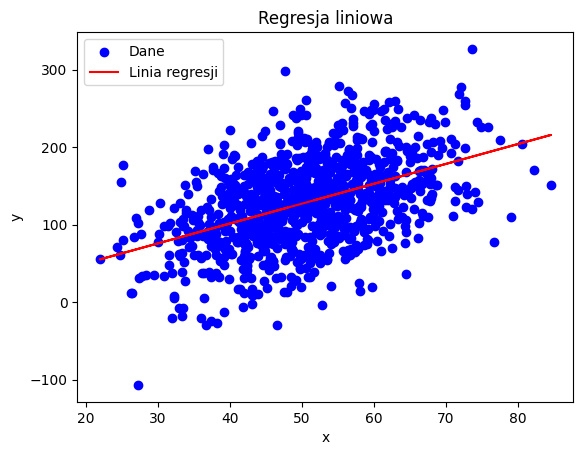

In [9]:
x_test = np.random.normal(loc=50, scale=10, size=1000)
a_true = 2.5
b_true = 5
y_test = a_true * x_test + b_true + np.random.normal(loc=0, scale=50, size=1000)

coefficients = np.polyfit(x_test, y_test, 1)
a_found, b_found = coefficients

print(f"a = {a_found}, b = {b_found}")

plt.scatter(x_test, y_test, color='blue', label='Dane')
plt.plot(x_test, a_found * x_test + b_found, color='red', label='Linia regresji')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Regresja liniowa')
plt.show()

In [11]:
from google.colab import files

uploaded = files.upload()

Saving anscombe.csv to anscombe.csv
Saving LungDisease.csv to LungDisease (1).csv


# Zadanie 2

Wczytaj dane z pliku **LungDisease.csv** do DataFrame za pomocą biblioteki `pandas`. Dane te zawierają informacje o liczbie lat, przez które pracownik był narażony na pył bawełniany (**Exposure**), oraz o miarze pojemności płuc (**PEFR** - szczytowy przepływ wydechowy).

- Następnie, używając biblioteki matplotlib lub seaborn, stwórz wykres punktowy, na którym na osi x znajdzie się zmienna **Exposure**, a na osi y zmienna **PEFR**.

- Po stworzeniu wykresu, oblicz współczynnik korelacji Pearsona między **Exposure** a **PEFR**, aby ilościowo określić siłę i kierunek zależności między tymi zmiennymi.

- Na koniec, dopasuj prostą regresji liniowej do danych, aby zobaczyć, jak **PEFR** zmienia się w zależności od **Exposure**. Wyświetl wykres z dopasowaną prostą regresji

- Zastanów się, czy na wykresie punktowym widać wyraźny trend lub wzorzec. Czy PEFR rośnie czy maleje wraz z Exposure? Czy są jakieś odstające punkty lub nietypowe dane?

Współczynnik korelacji Pearsona między Exposure a PEFR: -0.2770


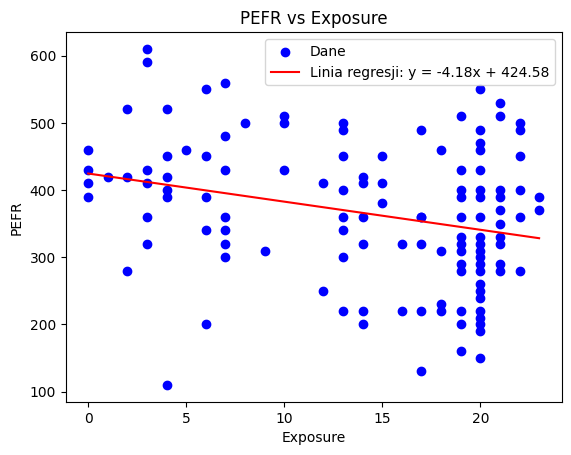

In [16]:
Lung_df = pd.read_csv('LungDisease.csv')

plt.scatter(Lung_df['Exposure'], Lung_df['PEFR'], color='blue', label='Dane')
plt.xlabel('Exposure')
plt.ylabel('PEFR')
plt.title('PEFR vs Exposure')

pearson_corr = Lung_df['Exposure'].corr(Lung_df['PEFR'])
print(f"Współczynnik korelacji Pearsona między Exposure a PEFR: {pearson_corr:.4f}")

a, b = np.polyfit(Lung_df['Exposure'], Lung_df['PEFR'], 1)

y_fit = a * Lung_df['Exposure'] + b

plt.plot(Lung_df['Exposure'], y_fit, color='red', label=f'Linia regresji: y = {a:.2f}x + {b:.2f}')

plt.legend()
plt.show()

# Zadanie 3

1. **Wczytaj dane:**
   - Wczytaj dane z pliku `anscombe.csv` do DataFrame za pomocą biblioteki `pandas`.
   - Przekształć dane, aby miały format:

     ```
         x1    y1    x2    y2    x3     y3   x4    y4
     0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
     1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
     ```

2. **Stwórz wykresy punktowe:**
   - Użyj biblioteki `matplotlib` lub `seaborn`, aby stworzyć wykresy.
   - Na każdej osi (`ax`) umieść wykres punktowy dla par `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.

3. **Dopasuj funkcje liniowe:**
   - Dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4` dopasuj funkcję liniową w postaci $y = a \cdot x + b$.
   - Oblicz współczynniki `a` i `b` wraz z błędami dla każdej pary.

4. **Oblicz współczynnik korelacji:**
   - Oblicz współczynnik korelacji Pearsona dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.



In [23]:
Anscombe_df = pd.read_csv('anscombe.csv', header=1)
Anscombe_df.columns = ['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']
Anscombe_df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


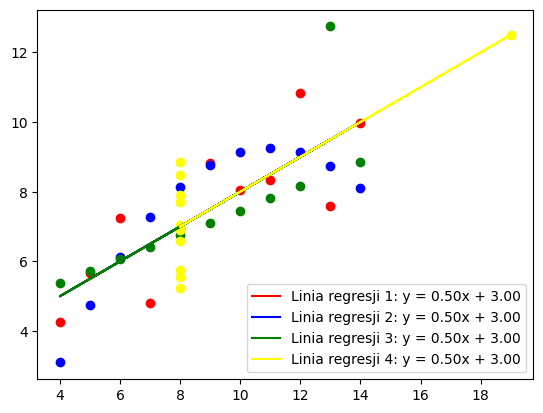

In [34]:
plt.scatter(Anscombe_df['x1'], Anscombe_df['y1'], color='red')
a, b = np.polyfit(Anscombe_df['x1'], Anscombe_df['y1'], 1)
y_fit = a * Anscombe_df['x1'] + b
plt.plot(Anscombe_df['x1'], y_fit, color='red', label=f'Linia regresji 1: y = {a:.2f}x + {b:.2f}')

plt.scatter(Anscombe_df['x2'], Anscombe_df['y2'], color='blue')
a, b = np.polyfit(Anscombe_df['x2'], Anscombe_df['y2'], 1)
y_fit = a * Anscombe_df['x2'] + b
plt.plot(Anscombe_df['x2'], y_fit, color='blue', label=f'Linia regresji 2: y = {a:.2f}x + {b:.2f}')

plt.scatter(Anscombe_df['x3'], Anscombe_df['y3'], color='green')
a, b = np.polyfit(Anscombe_df['x3'], Anscombe_df['y3'], 1)
y_fit = a * Anscombe_df['x3'] + b
plt.plot(Anscombe_df['x3'], y_fit, color='green', label=f'Linia regresji 3: y = {a:.2f}x + {b:.2f}')

plt.scatter(Anscombe_df['x4'], Anscombe_df['y4'], color='yellow')
a, b = np.polyfit(Anscombe_df['x4'], Anscombe_df['y4'], 1)
y_fit = a * Anscombe_df['x4'] + b
plt.plot(Anscombe_df['x4'], y_fit, color='yellow', label=f'Linia regresji 4: y = {a:.2f}x + {b:.2f}')

plt.legend()
plt.show()

In [37]:
data_pairs = [('x1', 'y1'), ('x2', 'y2'), ('x3', 'y3'), ('x4', 'y4')]

print("Współczynniki korelacji Pearsona:")

for x_col, y_col in data_pairs:
    pearson_corr = Anscombe_df[x_col].corr(Anscombe_df[y_col])
    print(f"  Korelacja między {x_col} a {y_col}: {pearson_corr:.4f}")

Współczynniki korelacji Pearsona:
  Korelacja między x1 a y1: 0.8164
  Korelacja między x2 a y2: 0.8162
  Korelacja między x3 a y3: 0.8163
  Korelacja między x4 a y4: 0.8165
